In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


# Functions

In [2]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    # ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def number_of_enrolled_ids_agebin(df, title, figsize=(10, 6)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 20]  # Adjusted to include 19
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-19']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['im_id'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


# Children balanced

In [3]:
# Mated and non-mated ids ###OBS
c_df = pd.read_csv('../data/child_balanced.csv')
c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index


c_df['Enrolled'] = np.where(c_df['im_id'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')

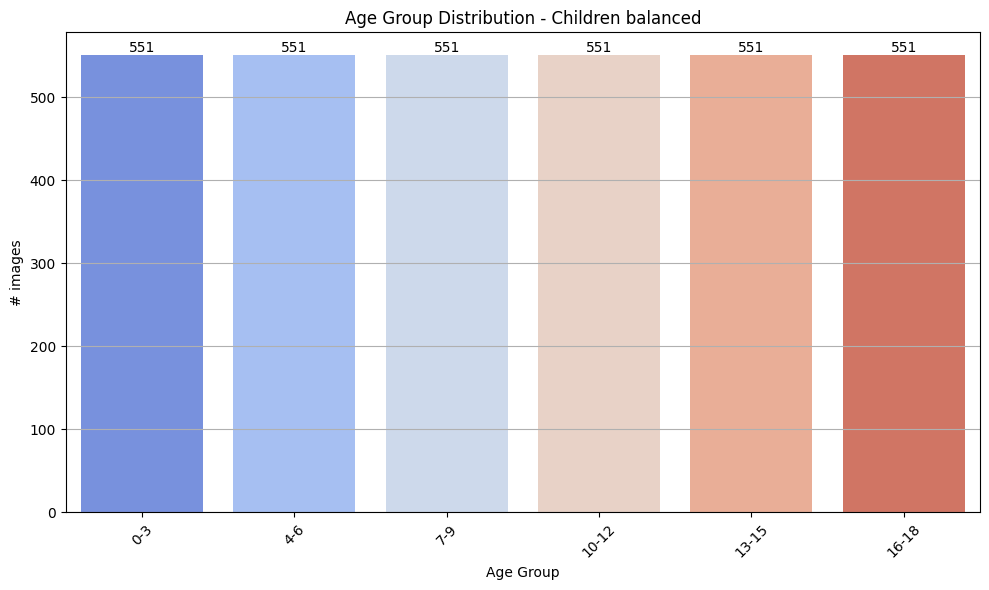

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,img_org_name,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,NaN,Enrolled,13-15
1,Caucasian_346_12,14,Caucasian,346,13-15,Caucasian_346,NaN,NaN,Non-enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,NaN,Enrolled,13-15
3,African_412_47,13,African,412,13-15,African_412,NaN,NaN,Enrolled,13-15
4,Asian_489_46,13,Asian,489,13-15,Asian_489,NaN,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...
3301,Indian_579_1,18,Indian,579,16-18,Indian_579,NaN,NaN,Non-enrolled,16-18
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,NaN,Non-enrolled,16-18
3303,m.0hht5gt,17,Indian,0hht5gt,16-18,0hht5gt,m.0hht5gt_0001,1.0,Enrolled,16-18
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,NaN,Enrolled,16-18


In [4]:
plot_age_group_distribution(c_df, 'Children balanced')

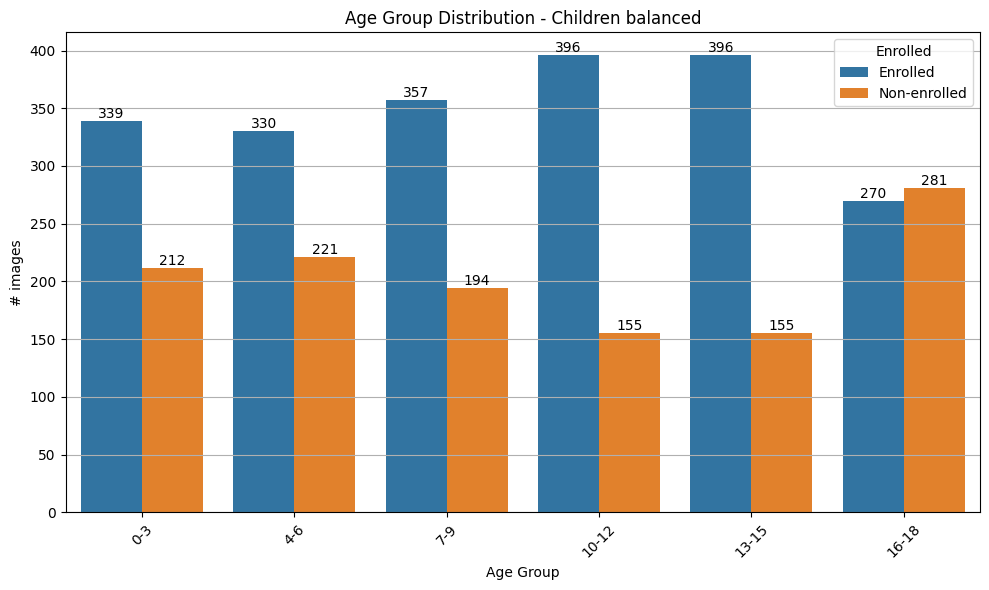

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,img_org_name,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,NaN,Enrolled,13-15
1,Caucasian_346_12,14,Caucasian,346,13-15,Caucasian_346,NaN,NaN,Non-enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,NaN,Enrolled,13-15
3,African_412_47,13,African,412,13-15,African_412,NaN,NaN,Enrolled,13-15
4,Asian_489_46,13,Asian,489,13-15,Asian_489,NaN,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...
3301,Indian_579_1,18,Indian,579,16-18,Indian_579,NaN,NaN,Non-enrolled,16-18
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,NaN,Non-enrolled,16-18
3303,m.0hht5gt,17,Indian,0hht5gt,16-18,0hht5gt,m.0hht5gt_0001,1.0,Enrolled,16-18
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,NaN,Enrolled,16-18


In [5]:
plot_age_group_distribution_mated(c_df, 'Children balanced')


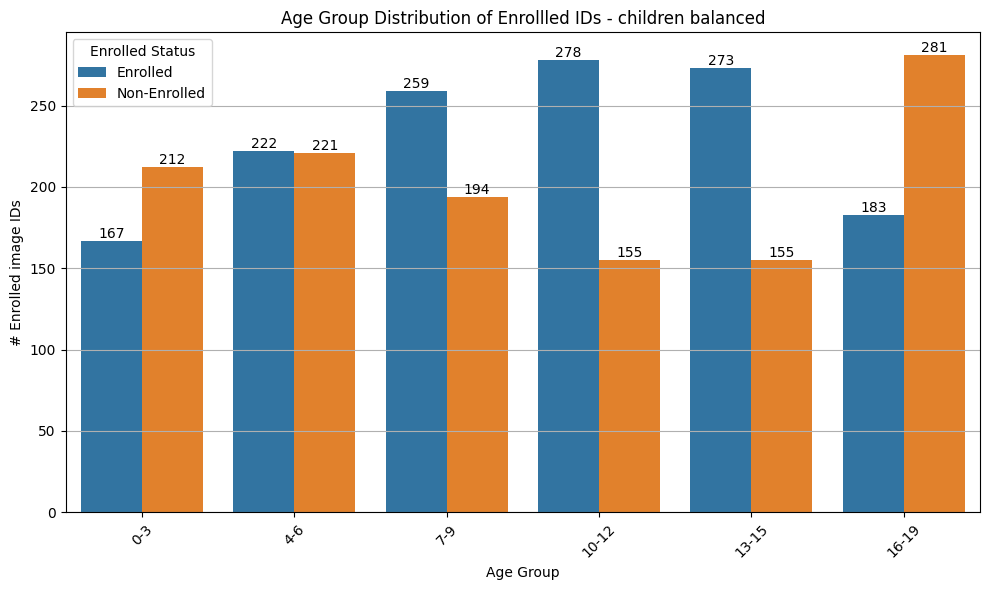

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,img_org_name,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,NaN,Enrolled,13-15
1,Caucasian_346_12,14,Caucasian,346,13-15,Caucasian_346,NaN,NaN,Non-enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,NaN,Enrolled,13-15
3,African_412_47,13,African,412,13-15,African_412,NaN,NaN,Enrolled,13-15
4,Asian_489_46,13,Asian,489,13-15,Asian_489,NaN,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...
3301,Indian_579_1,18,Indian,579,16-18,Indian_579,NaN,NaN,Non-enrolled,16-19
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,NaN,Non-enrolled,16-19
3303,m.0hht5gt,17,Indian,0hht5gt,16-18,0hht5gt,m.0hht5gt_0001,1.0,Enrolled,16-19
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,NaN,Enrolled,16-19


In [6]:
number_of_enrolled_ids_agebin(c_df, 'children balanced')

# Canonical children data

In [62]:
canonical_df = pd.read_csv('../data/OFIQ_results/canonical_children.csv', sep=';')

In [69]:
canonical_df.head()

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,DownwardCropOfTheFaceImage.scalar,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,im_id,image_names
0,African_0_1.png,21.258804,90.363855,0.609568,0.108497,0.010054,0.592055,0.0,6.148537,47,...,3,0,93,100,100,9,100,NaN,African_0,African_0_1
1,African_113_23.png,21.250883,100.621804,0.152006,0.208841,0.006678,0.109010,0.0,6.361239,-27,...,3,0,94,93,100,18,100,NaN,African_113,African_113_23
2,African_113_46.png,21.746929,60.420552,0.662809,0.318986,0.024407,0.113743,0.0,7.123347,-15,...,1,0,97,87,100,50,100,NaN,African_113,African_113_46
3,African_114_5.png,20.960348,77.353601,0.756084,0.127336,0.006598,0.408700,0.0,6.254216,45,...,1,0,97,100,100,71,0,NaN,African_114,African_114_5
4,African_119_4.png,24.878502,40.835322,0.278367,0.279319,0.013308,0.050315,0.0,6.850902,33,...,2,0,93,94,100,13,0,NaN,African_119,African_119_4


In [76]:
canonical_df['img_name'] = canonical_df['Filename'].str.rsplit('.', 1).str[0]
canonical_df['im_id'] = canonical_df['Filename'].str.rsplit('_', 1).str[0]


(array([   0,    2,    3, ..., 3302, 3304, 3305]),)

In [77]:
canonical_add_df = c_df[c_df['img_name'].isin(canonical_df['img_name'])]

/tmp/ipykernel_35426/482875231.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


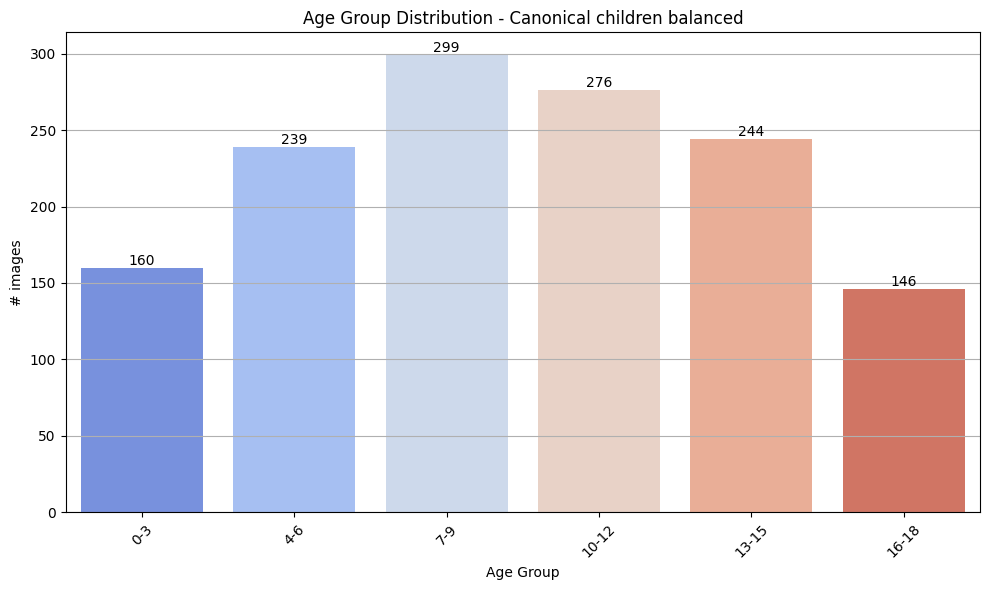

/tmp/ipykernel_35426/482875231.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


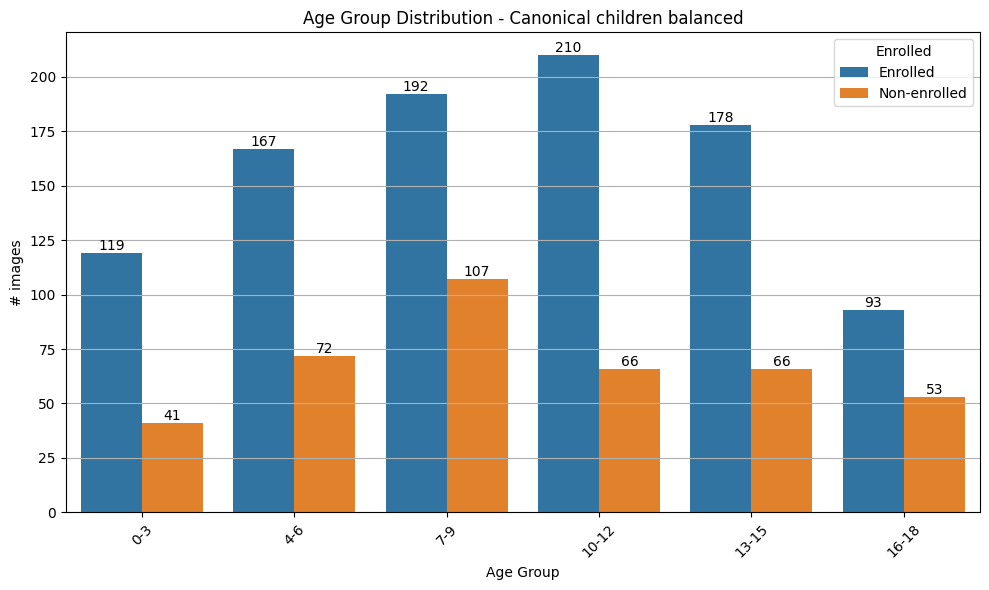

/tmp/ipykernel_35426/482875231.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


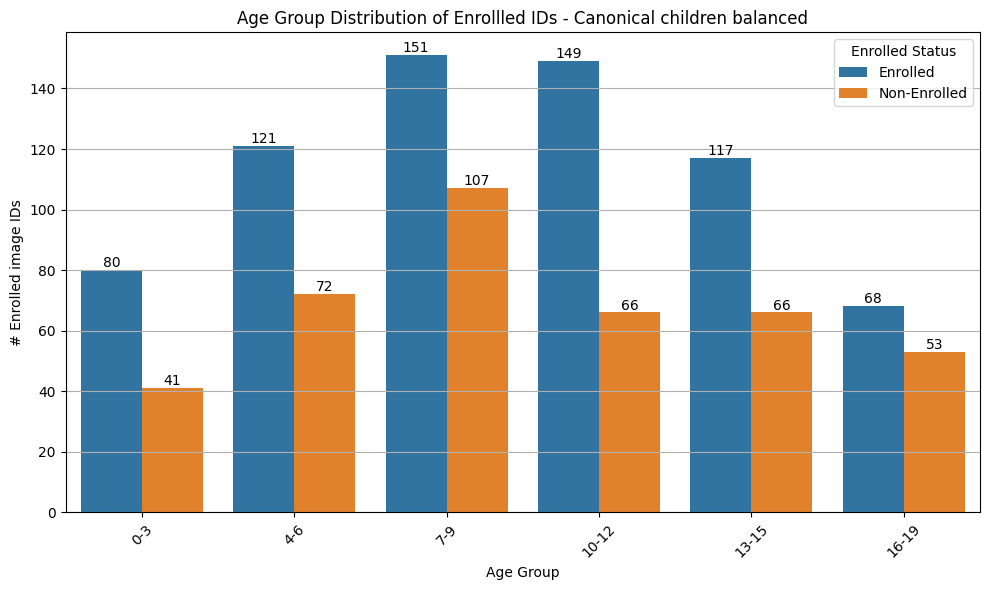

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,img_org_name,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,NaN,Enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,NaN,Enrolled,13-15
6,Indian_415_0,15,Indian,415,13-15,Indian_415,NaN,NaN,Enrolled,13-15
8,Caucasian_390_29,15,Caucasian,390,13-15,Caucasian_390,NaN,NaN,Enrolled,13-15
14,Indian_59_2,15,Indian,59,13-15,Indian_59,NaN,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...
3296,Indian_459_5,18,Indian,459,16-18,Indian_459,NaN,NaN,Non-enrolled,16-19
3298,Indian_125_1,17,Indian,125,16-18,Indian_125,NaN,NaN,Enrolled,16-19
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,NaN,Non-enrolled,16-19
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,NaN,Enrolled,16-19


In [79]:
plot_age_group_distribution(canonical_add_df, 'Canonical children balanced')
plot_age_group_distribution_mated(canonical_add_df, 'Canonical children balanced')
number_of_enrolled_ids_agebin(canonical_add_df,'Canonical children balanced')